**Tools - NumPy**

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

# Creating Arrays

Now let's import `numpy`. Most people import it as `np`:

In [1]:
import numpy as np

## `np.zeros`

The `zeros` function creates an array containing any number of zeros:

In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [3]:
np.zeros((3,4)) # Note: np.zeros(3,4) is not valid

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Some vocabulary

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

In [4]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
a.shape

(3, 4)

In [6]:
a.ndim  # equal to len(a.shape)

2

In [7]:
a.size

12

## N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [8]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## Array type
NumPy arrays have the type `ndarray`s:

In [9]:
type(np.zeros((3,4)))

numpy.ndarray

## `np.ones`
Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [10]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## np.array
Of course you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [11]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## Difference between python list and np.array

In [12]:
height = [1.73, 1.68, 1.71, 1.89, 1.79]
height * 2

[1.73, 1.68, 1.71, 1.89, 1.79, 1.73, 1.68, 1.71, 1.89, 1.79]

In [13]:
np_height = np.array([1.73, 1.68, 1.71, 1.89, 1.79])
np_height * 2

array([3.46, 3.36, 3.42, 3.78, 3.58])

In [14]:
# Can't do calculations with python lists directly
height = [1.73, 1.68, 1.71, 1.89, 1.79]
weight = [65.4, 59.2, 63.6, 88.4, 68.7]
# Try to calculate the corresponding BMI for each person
# It doesn't work
try:
    weight / height ** 2
except TypeError as e:
    print("Key error:", e)

Key error: unsupported operand type(s) for ** or pow(): 'list' and 'int'


In [15]:
# Works for np.array
np_height = np.array(height)
np_weight = np.array(weight)
np_weight / np_height ** 2

array([21.85171573, 20.97505669, 21.75028214, 24.7473475 , 21.44127836])

In [16]:
# np.array: contain only one type
np.array([1.0, "is", True])

array(['1.0', 'is', 'True'], dtype='<U32')

In [17]:
python_list = [1, 2, 3]
python_list + python_list

[1, 2, 3, 1, 2, 3]

In [18]:
numpy_array = np.array([1, 2, 3])
numpy_array + numpy_array

array([2, 4, 6])

## `np.arange`
You can create an `ndarray` using NumPy's `arange` function, which is similar to python's built-in `range` function:

In [19]:
np.arange(1, 5)

array([1, 2, 3, 4])

It also works with floats:

In [20]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

Of course you can provide a step parameter:

In [21]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

## `np.rand` and `np.randn`
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [22]:
np.random.rand(3,4)

array([[0.24700644, 0.52349585, 0.50358075, 0.89340122],
       [0.80606371, 0.8901604 , 0.31415938, 0.59593589],
       [0.62466155, 0.52028113, 0.18409703, 0.20818714]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [23]:
np.random.randn(3,4)

array([[-1.09389321,  0.27968057,  0.66570448, -0.84072056],
       [ 1.50933341, -0.34681998,  0.21421982, -0.12570889],
       [-1.32279648,  0.11273155,  0.36413782,  0.05188725]])

To give you a feel of what these distributions look like, let's use matplotlib for more details):

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

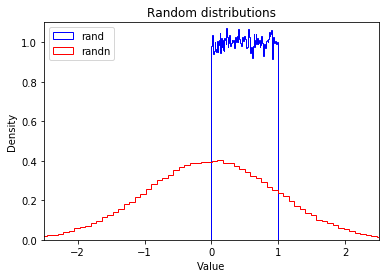

In [25]:
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

In [26]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. 

# Conditional operators

The conditional operators also apply elementwise:

In [27]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

In [28]:
m < 25  # equivalent to m < [25, 25, 25, 25]

array([ True,  True, False, False])

This is most useful in conjunction with boolean indexing (discussed below).

In [29]:
m[m < 25]

array([20, -5])

# Mathematical and statistical functions

Many mathematical and statistical functions are available for `ndarray`s.

## `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [30]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667


Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

In [31]:
# mean of the first column
np.mean(a[:,0])

3.75

You may test other useful statistical functions, such as np.median(), np.max(), and np.min().

## Universal functions
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [32]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [33]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.sign, np.ceil, np.modf, np.isnan):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]


## Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [34]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [35]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [36]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [37]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

# Array indexing
## One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [38]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [39]:
a[2:5]

array([ 3, 19, 13])

In [40]:
a[2:-1]

array([ 3, 19, 13,  7])

In [41]:
a[:2]

array([1, 5])

Of course, you can modify elements:

In [42]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

You can also modify an `ndarray` slice:

In [43]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

## Multi-dimensional arrays

In [44]:
b = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [45]:
b[1, 2]  # row 1, col 2

14

In [46]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [47]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

**Caution**: note the subtle difference between these two expressions: 

In [48]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [49]:
b[1:2, :]

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## Fancy indexing
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [50]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [51]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1 (again, and in this order)

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [52]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again)

array([41, 33, 37, 33])

## Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [53]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

# Linear algebra
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. 

## Matrix transpose

In [54]:
m1 = np.array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [55]:
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

## Matrix multiplication
Let's create two matrices and execute a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) using the `dot()` method.

In [56]:
n1 = np.array([[0, 1, 2, 3, 4],
           [5, 6, 7, 8, 9]])

In [57]:
n2 = np.array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [58]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Caution**: as mentionned previously, `n1*n2` is *not* a matric multiplication, it is an elementwise product.

## Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

In [59]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [60]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [61]:
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## Identity matrix
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors):

In [62]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [ 3.67761377e-16,  1.00000000e+00, -5.55111512e-17],
       [ 2.44942955e-15, -4.99600361e-16,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling `eye`:

In [63]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Determinant
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [64]:
linalg.det(m3)  # Computes the matrix determinant

43.99999999999999

# Saving and loading
Save to a csv file with commas as delimiters. You can set a different delimiter:

In [65]:
a = np.random.rand(2,3)
a

array([[0.26391118, 0.87533075, 0.67870169],
       [0.90437972, 0.73735576, 0.97719262]])

In [66]:
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [67]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.26391118, 0.87533075, 0.67870169],
       [0.90437972, 0.73735576, 0.97719262]])